IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

MA Peiran 28717249
ZHOU Runlin 28717281

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

## Analyse du AGRIBALYSE3-synthese

In [2]:
#taille de la base de données
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';') 
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))
print("Nombre de colonnes: ",len(data_synthese.columns))
print()

#l'affichage des en-têtes
for column in data_synthese.columns.tolist():
    print(f"{column}: {data_synthese[column].dtype}")

Nombre de lignes:  2517
Nombre de colonnes:  29

Code AGB: object
Code CIQUAL: int64
Groupe d'aliment: object
Sous-groupe d'aliment: object
Nom du Produit en Français: object
LCI Name: object
code saison: int64
code avion: int64
Livraison: object
Matériau d'emballage: object
Préparation: object
DQR: float64
Score unique EF 3.1: float64
Changement climatique: float64
Appauvrissement de la couche d'ozone: float64
Rayonnements ionisants: float64
Formation photochimique d'ozone: float64
Particules fines: float64
Effets toxicologiques sur la santé humaine : substances non-cancérogènes: float64
Effets toxicologiques sur la santé humaine : substances cancérogènes: float64
Acidification terrestre et eaux douces: float64
Eutrophisation eaux douces: float64
Eutrophisation marine: float64
Eutrophisation terrestre: float64
Écotoxicité pour écosystèmes aquatiques d'eau douce: float64
Utilisation du sol: float64
Épuisement des ressources eau: float64
Épuisement des ressources énergétiques: float64
É

In [3]:
#Supprimer les colonnes inutiles
data_synthese.drop(columns=["Code AGB","Code CIQUAL","Groupe d'aliment","Sous-groupe d'aliment","Nom du Produit en Français","LCI Name"], inplace=True)

In [4]:
# remplissage des valeurs nulles
# 预处理：填充空值
float_columns = data_synthese.select_dtypes(include='float64').columns

# Traversée la data frame, remplissez les valeurs nulles comme moyenne
# 遍历浮点列，将空值填充为平均值
for column in float_columns:
    mean_value = data_synthese[column].mean()
    data_synthese[column].fillna(mean_value, inplace=True)
    
# supprimer les lignes avec des strings vide
# 删除有空str的行
data_synthese.dropna(inplace=True)

In [5]:
# Conserver les valeurs dans l'intervalle de confiance à 95%
# 预处理：DQR取95%置信区间

# Définir un seuil de 1.96 écarts types (intervalle de confiance à 95 %)
# 定义阈值为1.96倍标准差（95%置信区间）
threshold = 1.96

# Calculer la moyenne et l'écart type
# 计算均值和标准差
mean = np.mean(data_synthese['DQR'])
std = np.std(data_synthese['DQR'])

# Calculer les bornes inférieur et supérieur
# 计算下限和上限阈值
lower_bound = mean - threshold * std

# Supprimer les valeurs en dehors de l'intervalle de confiance
# 删除超出置信区间的值
data_synthese = data_synthese[(data_synthese['DQR'] >= lower_bound)].copy()

# supprimer la colonne DQR
# 删除DQR列
data_synthese.drop(columns=["DQR"], inplace=True)

In [6]:
# Prétraitement : les points abnormales et les valeurs aberrantes
# 离群点和异常值

# Définir un seuil de 3 écarts types
# 定义阈值为3倍标准差
threshold = 3

# Stocker les noms de la colonne avec la type float
# 获取浮点类型列的列名
float_columns = data_synthese.select_dtypes(include='float64').columns
float_columns = float_columns.drop('Score unique EF 3.1', errors='ignore')

# Parcourir les colonnes et modifier les données dépassant le seuil
# 遍历列，将超出阈值的数据改为阈值
for column in float_columns:
    mean = data_synthese[column].mean()
    std = data_synthese[column].std()

    # Calculer les bornes inférieur et supérieur
    # 计算下限和上限阈值
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    # Remplacer les données dépassant par le seuil
    # 将超出阈值的数据改为阈值
    data_synthese[column] = np.where(data_synthese[column] < lower_bound, lower_bound, data_synthese[column])
    data_synthese[column] = np.where(data_synthese[column] > upper_bound, upper_bound, data_synthese[column])

(array([1671.,  378.,  199.,  127.,   42.,   37.,    7.,   19.,    2.,
          14.]),
 array([0.013 , 0.6087, 1.2044, 1.8001, 2.3958, 2.9915, 3.5872, 4.1829,
        4.7786, 5.3743, 5.97  ]),
 <BarContainer object of 10 artists>)

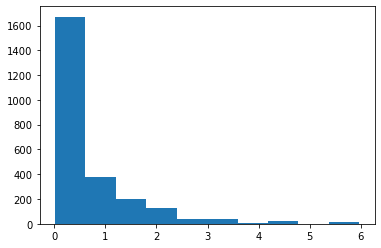

In [7]:
# Répartition des valeurs EF
# EF值的分布
plt.hist(data_synthese['Score unique EF 3.1'])

In [8]:
# Convertir des valeurs EF en une étiquette binaire en utilisant la médiane comme norme
# Désagrégation des données
# 以中位数为标准将其转换为二元label
median_value = data_synthese['Score unique EF 3.1'].median()
data_synthese['Score unique EF 3.1'] = ((data_synthese['Score unique EF 3.1'] > median_value)*2-1).astype(int)

# Renommer comme 'label'
data_synthese.rename(columns={'Score unique EF 3.1': 'label'}, inplace=True)

In [9]:
# # Étudier la relation entre le choix du livraison ou l'emballage et la valeur du EF
#研究生产运输对EF的影响
data_synthese_pt = data_synthese.iloc[:, :6].copy()

# extraire l'étiquette
labels = data_synthese_pt['label'].values
data_synthese_pt.drop(columns=['label'], inplace=True)

# str
int_columns = data_synthese_pt.select_dtypes(include='int64').columns
data_synthese_pt[int_columns] = data_synthese_pt[int_columns].astype(str)

# dummies
cols = data_synthese_pt.columns
data_synthese_pt = pd.get_dummies(data_synthese_pt, prefix=cols, prefix_sep='_').copy()

In [10]:
#l'affichage des données après traitement
data_synthese_pt

,code saison_0,code saison_1,code saison_2,code avion_0,code avion_1,Livraison_Ambiant (court),Livraison_Ambiant (long),Livraison_Ambiant (moyen),Livraison_Congelé,Livraison_Glacé,...,Matériau d'emballage_Verre,Préparation_Cuisson à l'eau,Préparation_Four,Préparation_Four,Préparation_Friture,Préparation_Micro-onde,Préparation_Micro-onde,Préparation_Pas de préparation,Préparation_Poêle,Préparation_Réfrigéré chez le consommateur
0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2513,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2514,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2515,0,0,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [11]:
# transforme à desc
# 转化为desc
noms = [nom for nom in data_synthese_pt.columns]
desc = np.array(data_synthese_pt[noms])

# knn : trouver le meilleur k
acc_max = 0
best_k = 1
for k in range(30)[1:]:
    knn = cl.ClassifierKNN(len(noms),k)
    knn.train(desc[:2000],labels[:2000])
    if knn.accuracy(desc[2000:],labels[2000:]) > acc_max:
        acc_max = 0
        best_k = k
knn = cl.ClassifierKNN(len(noms),best_k)
(res_all, res_moy, res_sd) = ev.validation_croisee(knn, (desc, labels), 10)

In [12]:
print("best k : ",best_k)
print("Perf obtenues : ",res_all)
print("Accuracy moyenne: ",res_moy,"\técart type: ", res_sd)

Perf obtenues :  [0.6867469879518072, 0.752, 0.714859437751004, 0.76, 0.6987951807228916, 0.772, 0.7831325301204819, 0.732, 0.7188755020080321, 0.7848605577689243]
Accuracy moyenne:  0.7403270196323142 	écart type:  0.03334040804940232


In [13]:
# Étudier la relation entre l'impact environnementales et la valeur du EF
#研究环境影响对EF的影响
data_synthese_ev = data_synthese.iloc[:, 5:].copy()

labels = data_synthese_ev['label'].values
data_synthese_ev.drop(columns=['label'], inplace=True)


# 对选择的列进行最小-最大标准化
# Normalisation min-max sur les colonnes sélectionnées
for column in data_synthese_ev.columns:
    min_val = data_synthese_ev[column].min()
    max_val = data_synthese_ev[column].max()
    data_synthese_ev[column] = (data_synthese_ev[column] - min_val) / (max_val - min_val)

In [14]:
#l'affichage des données après traitement
data_synthese_ev

,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,0.233993,0.066920,1.000000,0.251314,0.219085,0.125204,0.353838,0.213624,0.272993,0.073179,0.065775,0.176252,0.028109,0.315081,1.000000,0.571973
1,0.024670,0.007913,0.025517,0.018210,0.023746,0.017945,0.022454,0.012320,0.016290,0.011782,0.006041,0.020674,0.025446,0.308106,0.051746,0.039336
2,0.011007,0.003407,0.020689,0.006156,0.005520,0.010675,0.013197,0.003232,0.008042,0.010663,0.002686,0.013692,0.024728,0.314119,0.021282,0.020398
3,0.026964,0.003946,0.020345,0.015812,0.019589,0.018458,0.030885,0.016390,0.027905,0.021455,0.015710,0.020072,0.032294,0.341418,0.051275,0.027368
4,0.233993,0.066920,1.000000,0.251314,0.219085,0.125204,0.353838,0.213624,0.272993,0.073179,0.065775,0.176252,0.028109,0.315081,1.000000,0.571973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,0.777378,0.046659,0.318443,0.270107,0.466300,0.742072,0.591878,0.483451,0.322981,0.871115,0.501107,0.771757,0.659402,0.353323,0.514584,0.247788
2513,0.819096,0.050738,0.285685,0.283068,0.481693,0.767732,0.613919,0.498525,0.336213,0.893481,0.516785,0.799847,0.680536,0.356210,0.538126,0.267515
2514,0.146384,0.050869,0.069309,0.419159,0.221856,0.153259,0.218287,0.204364,0.097594,0.124622,0.126920,0.093989,0.023121,0.284523,0.277279,1.000000
2515,0.178020,0.062776,0.189135,0.511182,0.271422,0.192947,0.272287,0.250879,0.125529,0.152581,0.155664,0.114855,0.024812,0.285533,0.398286,1.000000


In [15]:
noms = [nom for nom in data_synthese_ev.columns]
desc = np.array(data_synthese_ev[noms])

pb = cl.ClassifierPerceptronBiais(len(data_synthese_ev.columns), learning_rate=5e-3, init=True)
(res_all, res_moy, res_sd) = ev.validation_croisee(pb, (desc, labels), 10)

In [16]:
print("Perf obtenues : ",res_all)
print("Accuracy moyenne: ",res_moy,"\técart type: ", res_sd)

Perf obtenues :  [0.9397590361445783, 0.908, 0.9116465863453815, 0.932, 0.8755020080321285, 0.912, 0.9156626506024096, 0.904, 0.9196787148594378, 0.9203187250996016]
Accuracy moyenne:  0.9138567721083538 	écart type:  0.016400900092864136


In [18]:
pb.train(desc[:2000],labels[:2000])

[1.0493657151855673,
 0.6808834491374153,
 0.5419508006882425,
 0.44844348493841474,
 0.38136341810718727,
 0.33183707520065914,
 0.2909636459690904,
 0.2592603003687939,
 0.2328317270683287,
 0.21011946670937115,
 0.19327543406774073,
 0.1749858676177096,
 0.1611678213422117,
 0.1561001867142355,
 0.1419544153205451,
 0.12814586927675903,
 0.12821133756829567,
 0.11536112019434873,
 0.11173766694974191,
 0.10820247248321577,
 0.09810759597663968,
 0.09166145115939987,
 0.08940995193139974,
 0.08617585917204916,
 0.08155556970108259,
 0.08088472621717407,
 0.07657595733608397,
 0.07817982115172405,
 0.07210538900362384,
 0.07011527223132125,
 0.06952792288103561,
 0.07026970319110967,
 0.07004105747614517,
 0.07184796273826463,
 0.08681735933706464,
 0.06147237247804135,
 0.10767985556002721,
 0.07162127817741296,
 0.06177460491303949,
 0.05728006421170578,
 0.05603240835616892,
 0.055468587299117376,
 0.05410484373598061,
 0.05328960219021103,
 0.05272555873707771,
 0.0537766962390935

In [19]:
print("w: ",pb.w)

w:  [ 2.33106594 -0.97951244 -1.14455786  0.99596594  0.77289211  3.88899145
 -2.03163018  1.35838513  0.8419923   0.56461658  1.30490215  2.25442244
  2.18270779 -4.24571499  0.54582365  2.23953314]


## Analyse du AGRIBALYSE3-ingredients

In [2]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv", sep=';') 
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


In [3]:
for column in data_ingredients.columns.tolist():
    print(f"{column}: {data_ingredients[column].dtype}")

Ciqual AGB: object
Ciqual code: object
Groupe d'aliment: object
Sous-groupe d'aliment: object
Nom Français: object
LCI Name: object
Ingredients: object
Code et Nom: object
Groupe: object
Sous-groupe: object
Formation photochimique d'ozone: float64
Particules fines: float64
Effets toxicologiques sur la santé humaine : substances non-cancérogènes: float64
Effets toxicologiques sur la santé humaine : substances cancérogènes: float64
Acidification terrestre et eaux douces: float64
Eutrophisation eaux douces: float64
Eutrophisation marine: float64
Eutrophisation terrestre: float64
Écotoxicité pour écosystèmes aquatiques d'eau douce: float64
Utilisation du sol: float64
Épuisement des ressources eau: float64
Épuisement des ressources énergétiques: float64
Épuisement des ressources minéraux: float64
Pt/kg de produit: float64
m3 depriv./kg de produit: float64
MJ/kg de produit: float64
kg Sb eq/kg de produit: float64


In [4]:
data_ingredients = data_ingredients[['Groupe d\'aliment','Sous-groupe d\'aliment','Ingredients','MJ/kg de produit','kg Sb eq/kg de produit']].copy()

In [5]:
# Prétraitement : remplissage des valeurs nulles
# 预处理：填充空值
float_columns = data_ingredients.select_dtypes(include='float64').columns

for column in float_columns:
    mean_value = data_ingredients[column].mean()
    data_ingredients[column].fillna(mean_value, inplace=True)
data_ingredients.dropna(inplace=True)

# Prétraitement : les points abnormales et les valeurs aberrantes
# 离群点和异常值

# Définir un seuil de 3 écarts types
# 定义阈值为3倍标准差
threshold = 3

# Stocker les noms de la colonne avec la type float
# 获取浮点类型列的列名
float_columns = data_ingredients.select_dtypes(include='float64').columns
float_columns = float_columns.drop('Score unique EF 3.1', errors='ignore')

# Parcourir les colonnes et modifier les données dépassant le seuil
# 遍历列，将超出阈值的数据改为阈值
for column in float_columns:
    mean = data_ingredients[column].mean()
    std = data_ingredients[column].std()

    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    data_ingredients[column] = np.where(data_ingredients[column] < lower_bound, lower_bound, data_ingredients[column])
    data_ingredients[column] = np.where(data_ingredients[column] > upper_bound, upper_bound, data_ingredients[column])

In [6]:
# calculer label avec
#kg Sb eq/kg de produit这个是资源消耗潜力 MJ/kg de produit这个是能量密度 那我就搞个kg Sb eq/MJ，就是生产一兆焦耳能量所消耗的资源作为label
data_ingredients['label'] = data_ingredients['kg Sb eq/kg de produit'] / data_ingredients['MJ/kg de produit']
data_ingredients.drop(columns=['kg Sb eq/kg de produit','MJ/kg de produit'], inplace=True)

# 以中位数为标准将其转换为二元label
# Convertir des valeurs EF en une étiquette binaire en utilisant la médiane comme norme
median_value = data_ingredients['label'].median()
data_ingredients['label'] = ((data_ingredients['label'] > median_value)*2-1).astype(int)

labels = data_ingredients['label'].values
data_ingredients.drop(columns=['label'], inplace=True)

# dummies
cols = data_ingredients.columns
data_ingredients = pd.get_dummies(data_ingredients, prefix=cols, prefix_sep='_').copy()

In [7]:
#l'affichage des données après traitement
data_ingredients

,Groupe d'aliment_aides culinaires et ingrédients divers,Groupe d'aliment_aliments infantiles,Groupe d'aliment_boissons,Groupe d'aliment_entrées et plats composés,"Groupe d'aliment_fruits, légumes, légumineuses et oléagineux",Groupe d'aliment_glaces et sorbets,Groupe d'aliment_lait et produits laitiers,Groupe d'aliment_matières grasses,Groupe d'aliment_produits céréaliers,Groupe d'aliment_produits sucrés,...,Ingredients_Viande de bœuf sans os,Ingredients_Viande de moutton sans os,Ingredients_Viande de porc maigre,Ingredients_Viande de poulet sans os,Ingredients_Viande de veau sans os,Ingredients_Vin blanc,Ingredients_Vin rouge,Ingredients_Yaourt,Ingredients_Échalote,Ingredients_Œuf de poule
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
dtypes = np.array(data_ingredients.dtypes)
print(np.unique(dtypes))

[dtype('uint8')]


In [10]:
noms = [nom for nom in data_ingredients.columns]
desc = np.array(data_ingredients[noms])

import graphviz as gv

noms1 = [0 for n in noms]
arbre = cl.ClassifierArbreDecision(len(noms), 0.75, noms1)
(res_all, res_moy, res_sd) = ev.validation_croisee(arbre, (desc, labels), 10)
arbre.train(desc,labels)

In [14]:
graphe_arbre = gv.Digraph(format='png')
arbre.affiche(graphe_arbre)

# Affichage du graphe obtenu:
graphe_arbre

TypeError: cannot use a string pattern on a bytes-like object

In [ ]:
def test0(ab):
    if ab.est_feuille

In [ ]:
print("Perf obtenues : ",res_all)
print("Accuracy moyenne: ",res_moy,"\técart type: ", res_sd)

## Analyse du AGRIBALYSE3-etapes

In [39]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-ingredients.csv", sep=';')

In [41]:
# Prétraitement : remplissage des valeurs nulles
float_columns = data_etapes.select_dtypes(include='float64').columns

for column in float_columns:
    mean_value = data_etapes[column].mean()
    data_etapes[column].fillna(mean_value, inplace=True)
data_etapes.dropna(inplace=True)

# Prétraitement : les points abnormales et les valeurs aberrantes
threshold = 3

float_columns = data_etapes.select_dtypes(include='float64').columns
float_columns = float_columns.drop('Score unique EF 3.1', errors='ignore')

for column in float_columns:
    mean = data_etapes[column].mean()
    std = data_etapes[column].std()

    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    data_etapes[column] = np.where(data_etapes[column] < lower_bound, lower_bound, data_etapes[column])
    data_etapes[column] = np.where(data_etapes[column] > upper_bound, upper_bound, data_etapes[column])

data_etapes['groupe'] = data_etapes['Groupe']
# Supprimez les colonnes str inutiles, puis fusionnez par nom
data_etapes = data_etapes.iloc[:, 10:].copy()
data_etapes = data_etapes.groupby('groupe').mean()

# normaliser
for column in data_etapes.columns:
    min_val = data_etapes[column].min()
    max_val = data_etapes[column].max()
    data_etapes[column] = (data_etapes[column] - min_val) / (max_val - min_val)

In [44]:
#l'affichage des données après traitement
data_etapes

,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
groupe,,,,,,,,,,,,,,,,,
aides culinaires et ingrédients divers,0.213761,0.219328,0.312446,0.309064,0.158182,0.121848,0.538288,0.310035,0.108664,0.329690,0.256821,0.122316,0.213279,0.326896,0.649130,0.223594,0.554647
aliments infantiles,0.000000,0.000000,0.000000,0.131830,0.095301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316193,0.020414,0.000000
boissons,0.076582,0.067530,0.884270,0.000000,0.096572,0.038189,0.238033,0.136177,0.021766,0.144974,0.071294,0.025819,0.231806,0.080924,0.463862,0.000000,0.695273
entrées et plats composés,0.285525,0.302581,0.287386,0.363541,0.323470,0.266950,0.339851,0.301524,0.269047,0.334371,0.306856,0.273070,0.203691,0.290914,0.366768,0.295576,0.334283
"fruits, légumes, légumineuses et oléagineux",0.113901,0.083545,0.056230,0.323750,0.064834,0.030933,0.147288,0.221977,0.029780,0.261680,0.114778,0.042788,0.162767,0.163844,0.996667,0.196854,0.222254
glaces et sorbets,0.058786,0.093626,0.017379,0.349975,0.000000,0.033930,0.073259,0.072931,0.037669,0.115687,0.070746,0.054097,0.070599,0.080085,0.000000,0.163050,0.253509
lait et produits laitiers,0.182283,0.274220,0.218321,0.238156,0.136793,0.111421,0.283772,0.267276,0.113100,0.349045,0.253248,0.128880,0.232544,0.275119,0.206297,0.169178,0.297401
matières grasses,0.261522,0.323031,0.304173,0.055692,0.296156,0.152687,0.998703,0.633397,0.129373,0.586067,0.544013,0.156288,0.437315,0.638772,0.342249,0.151855,0.484512
produits céréaliers,0.156819,0.200064,0.006857,0.142170,0.095990,0.093636,0.361873,0.252396,0.099721,0.304082,0.276180,0.120305,0.218884,0.279536,0.419459,0.057015,0.113334


In [45]:
index_array = np.array(data_etapes.index)
data_etapes.reset_index(drop=True, inplace=True)
print(index_array)

['aides culinaires et ingrédients divers' 'aliments infantiles' 'boissons'
 'entrées et plats composés' 'fruits, légumes, légumineuses et oléagineux'
 'glaces et sorbets' 'lait et produits laitiers' 'matières grasses'
 'produits céréaliers' 'produits sucrés' 'viandes, œufs, poissons']


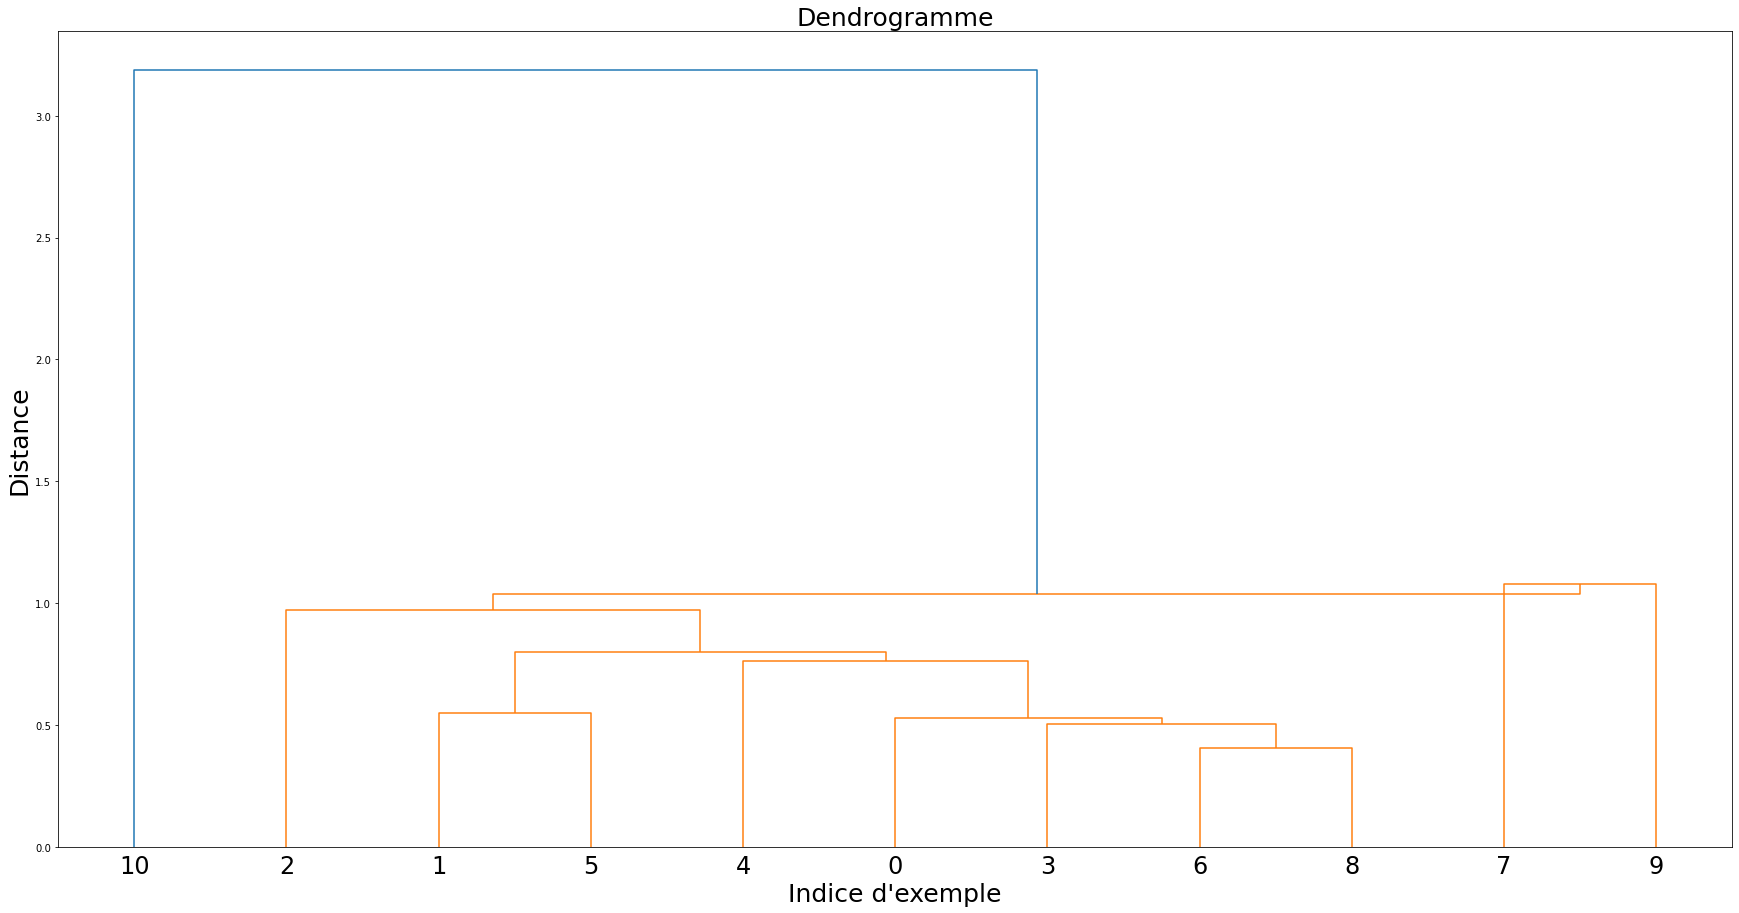

[[6, 8, 0.40408613058962506, 2],
 [3, 11, 0.504098021257663, 3],
 [0, 12, 0.5274743158225639, 4],
 [1, 5, 0.5474958544645658, 2],
 [4, 13, 0.7611640120390206, 5],
 [14, 15, 0.8007635808192438, 7],
 [2, 16, 0.9703134780500582, 8],
 [7, 9, 1.0768693441724124, 2],
 [17, 18, 1.0354981035654371, 10],
 [10, 19, 3.1870303307111985, 11]]

In [46]:
clust.CHA(data_etapes,linkage='centroid',verbose=False,dendrogramme=True)

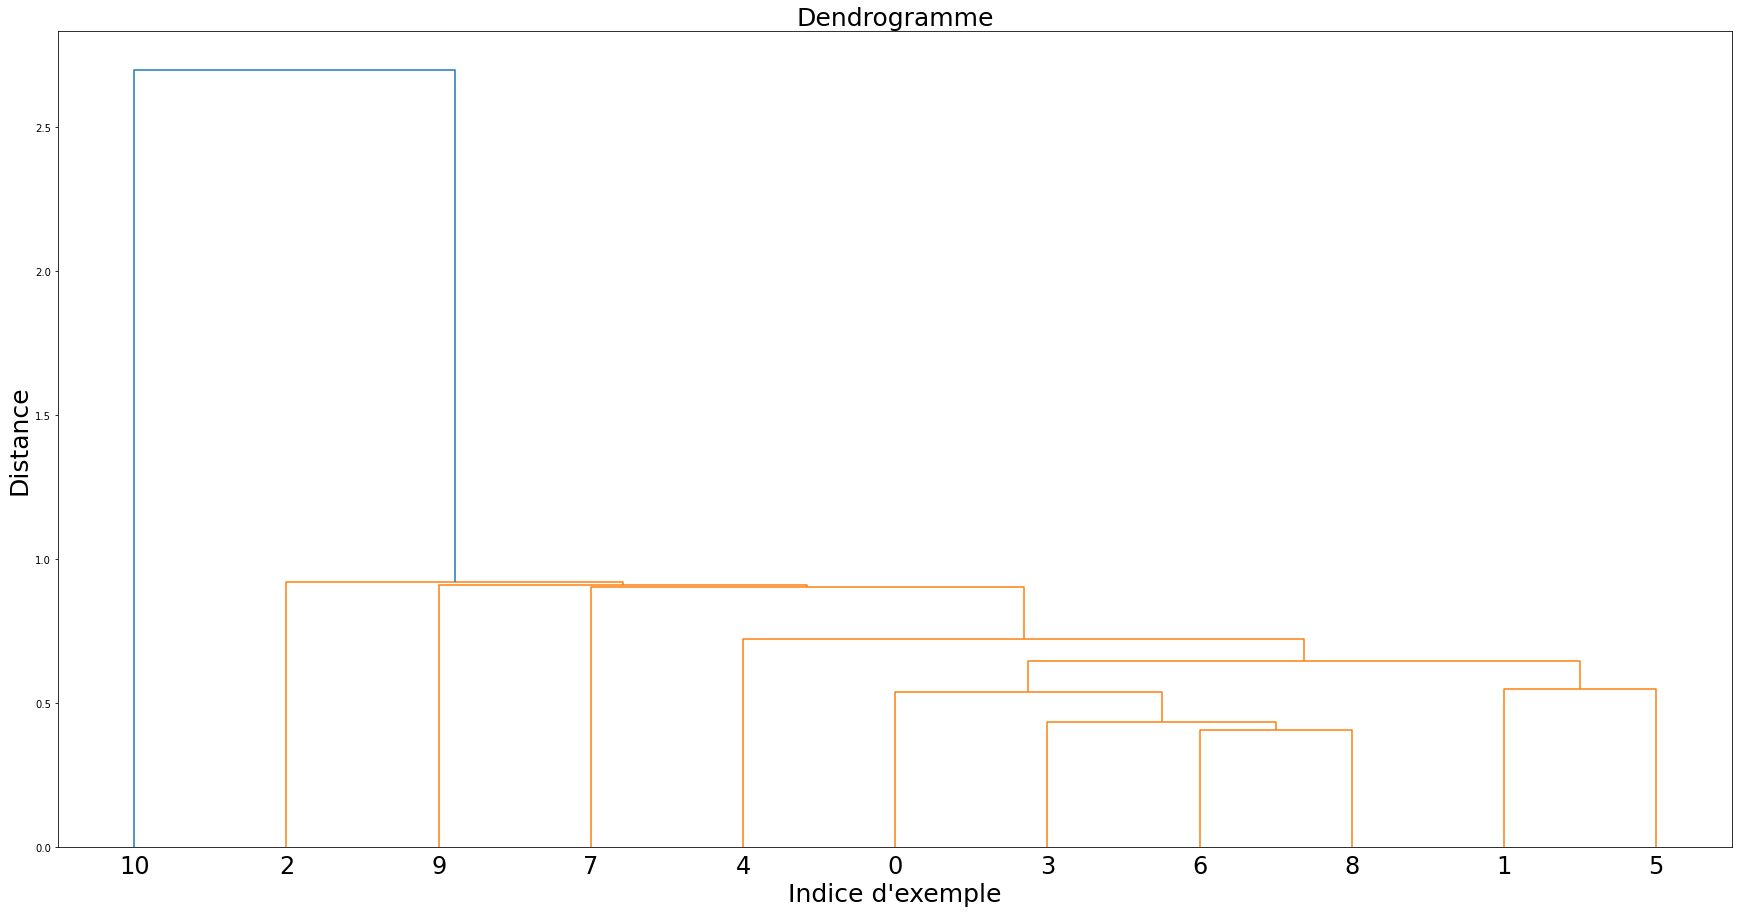

[[6, 8, 0.40408613058962506, 2],
 [3, 11, 0.433219183694631, 3],
 [0, 12, 0.5378964559224022, 4],
 [1, 5, 0.5474958544645658, 2],
 [13, 14, 0.6445017706811987, 6],
 [4, 15, 0.7228923328209635, 7],
 [7, 16, 0.9029533299271735, 8],
 [9, 17, 0.9090396068831219, 9],
 [2, 18, 0.9197174581629247, 10],
 [10, 19, 2.6962478695346173, 11]]

In [47]:
clust.CHA(data_etapes,linkage='simple',verbose=False,dendrogramme=True)

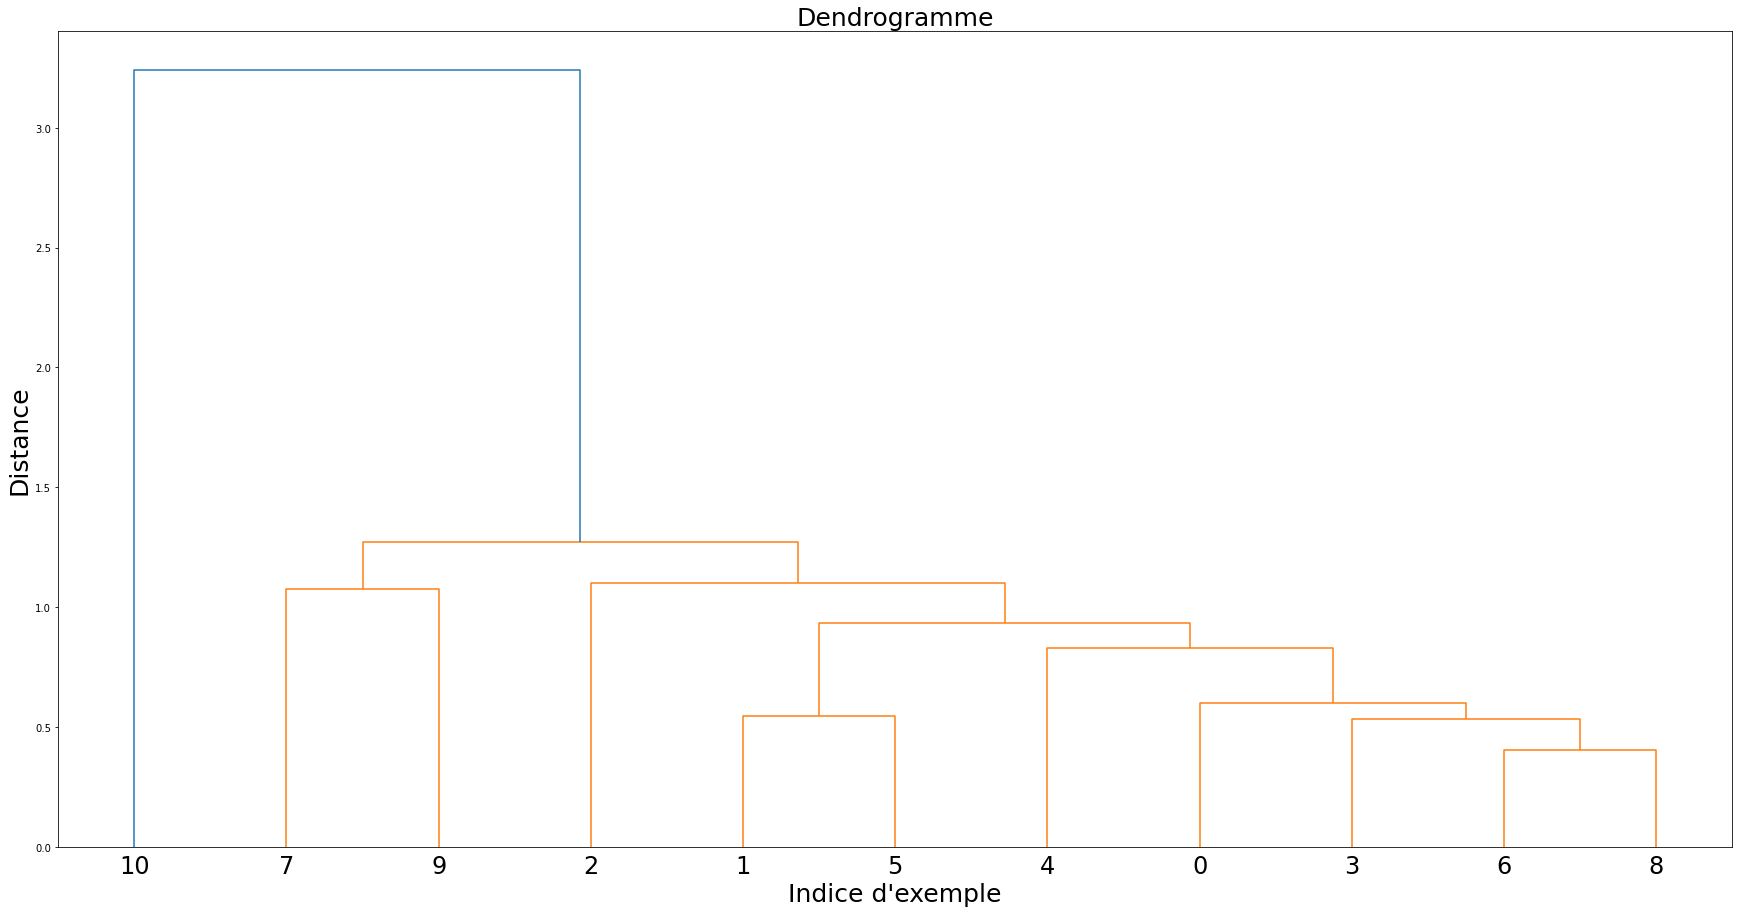

[[6, 8, 0.40408613058962506, 2],
 [3, 11, 0.5337032568022416, 3],
 [1, 5, 0.5474958544645658, 2],
 [0, 12, 0.5993317529048038, 4],
 [4, 14, 0.8281997007699659, 5],
 [13, 15, 0.9338197516987593, 7],
 [7, 9, 1.0768693441724124, 2],
 [2, 16, 1.1023629308913678, 8],
 [17, 18, 1.2734908684804693, 10],
 [10, 19, 3.239937457145513, 11]]

In [48]:
clust.CHA(data_etapes,linkage='average',verbose=False,dendrogramme=True)

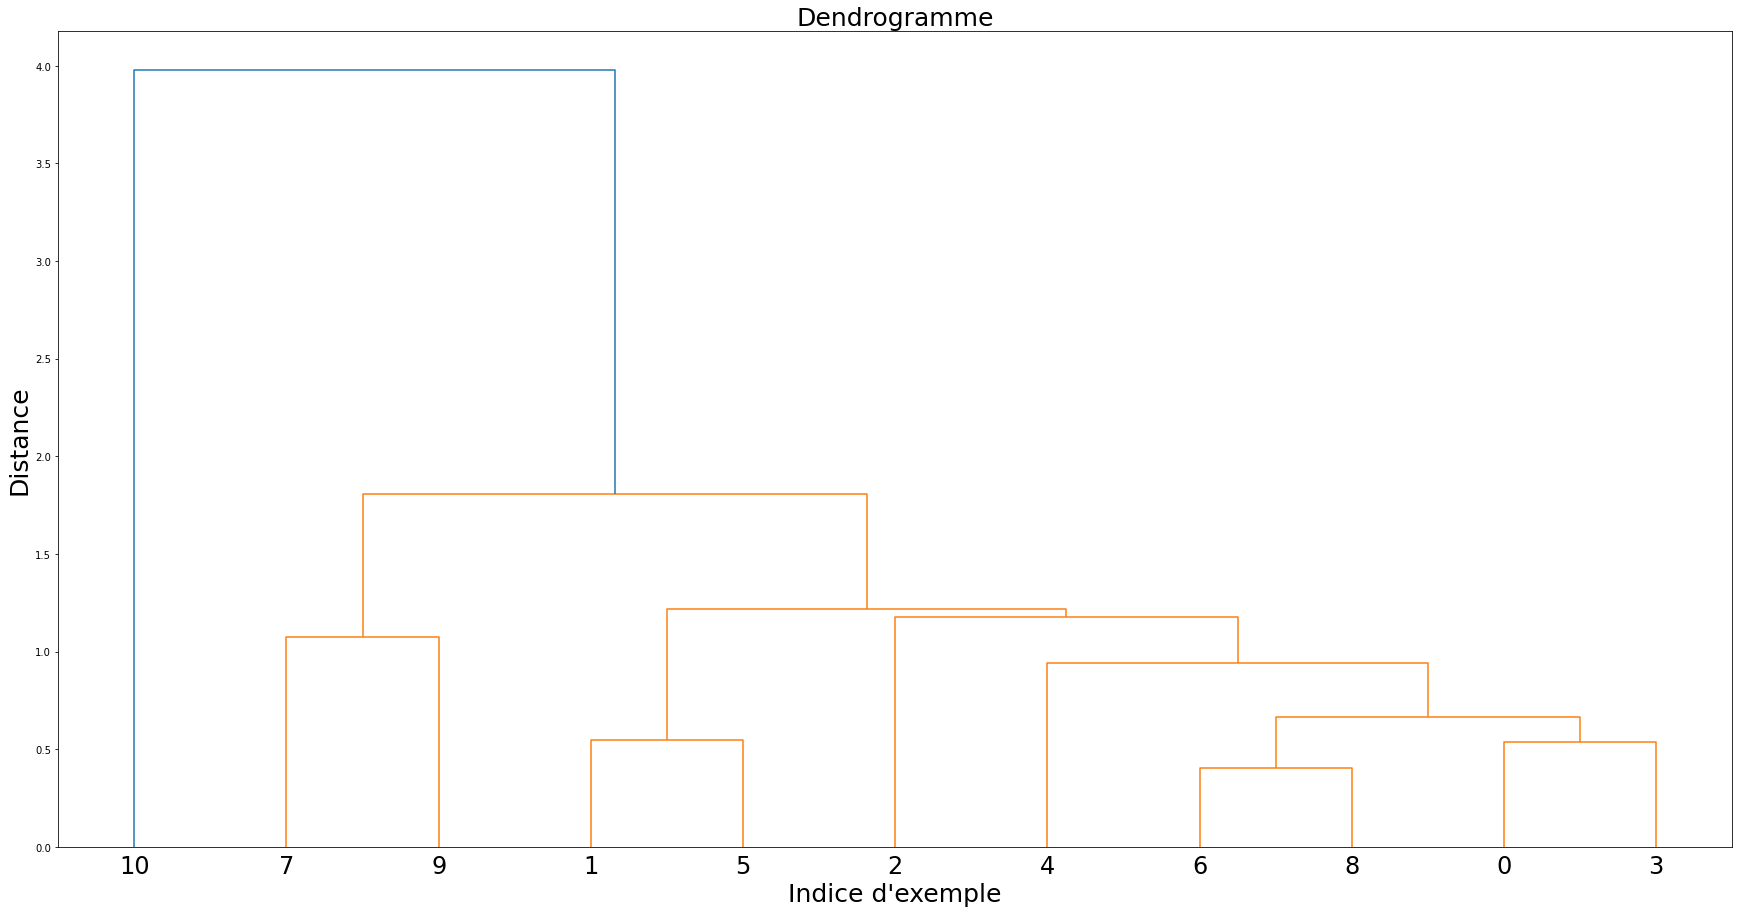

[[6, 8, 0.40408613058962506, 2],
 [0, 3, 0.5378964559224022, 2],
 [1, 5, 0.5474958544645658, 2],
 [11, 12, 0.6652846466958385, 4],
 [4, 14, 0.9422315306122778, 5],
 [7, 9, 1.0768693441724124, 2],
 [2, 15, 1.175863111588029, 6],
 [13, 17, 1.216368333145843, 8],
 [16, 18, 1.807175814477788, 10],
 [10, 19, 3.977474345098902, 11]]

In [49]:
clust.CHA(data_etapes,linkage='complete',verbose=False,dendrogramme=True)